In [2]:
import os, requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Request meta data from a weather station

In [ ]:
params = {"id": "10637"}
url_stations_meta = "https://api.meteostat.net/v2/stations/meta" 
r = requests.get(url_stations_meta, params=params)
r.ok

``params`` are inserted into the url by the requests lib:

In [34]:
r.url

'https://api.meteostat.net/v2/stations/meta?id=10637'

The reterned content is best readable using ``.json()``:

In [6]:
r.json()

{'meta': {'exec_time': 0.001, 'generated': '2021-05-01 16:14:48'},
 'data': {'id': '10637',
  'name': {'de': 'Frankfurt Flughafen',
   'es': 'Aeropuerto de Fráncfort',
   'en': 'Frankfurt Airport'},
  'country': 'DE',
  'region': 'HE',
  'national': '01420',
  'wmo': '10637',
  'icao': 'EDDF',
  'iata': 'FRA',
  'latitude': 50.05,
  'longitude': 8.6,
  'elevation': 111,
  'timezone': 'Europe/Berlin',
  'inventory': {'hourly': {'start': '1926-01-01', 'end': '2021-12-04'},
   'daily': {'start': '1934-05-01', 'end': '2021-04-27'}}}}

# Request hourly weather data
https://dev.meteostat.net/api/stations/hourly.html#endpoint

Limited to periods of 10 days

### API key required

Get a API key from https://dev.meteostat.net/api/#api-key and save it in a ``api_key.txt`` file within the same directory.

2000 requests per day and 2 requests per second are allowed with the free account.

### Station ID required
Find the desired station from https://meteostat.net/en

In [46]:
station_id = "10865"

### Station name
Get the station name from the meta data:

In [47]:
r = requests.get(url_stations_meta, params={"id": station_id})
r.ok

True

In [48]:
r.json()

{'meta': {'exec_time': 0.001, 'generated': '2021-05-01 21:55:03'},
 'data': {'id': '10865',
  'name': {'en': 'München'},
  'country': 'DE',
  'region': 'BY',
  'national': '03379',
  'wmo': '10865',
  'icao': None,
  'iata': None,
  'latitude': 48.1333,
  'longitude': 11.55,
  'elevation': 520,
  'timezone': 'Europe/Berlin',
  'inventory': {'hourly': {'start': '1979-01-01', 'end': '2021-12-04'},
   'daily': {'start': '1879-01-01', 'end': '2021-04-28'}}}}

In [49]:
location_name = r.json()["data"]["name"]["en"]
location_name

'München'

### the actual weather data

In [51]:
url_hourly = "https://api.meteostat.net/v2/stations/hourly"

In [52]:
params = {"station": station_id, "start": "2021-04-01", "end": "2021-04-08"}
r = requests.get(url_hourly, params=params, headers=headers)
r.ok

True

In [53]:
wd = pd.DataFrame(r.json()["data"])
wd.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2021-04-01 00:00:00,12.2,2.6,52,0.0,NaN,220,10.1,NaN,1021.5,0,NaN
1,2021-04-01 01:00:00,11.8,2.5,53,0.0,NaN,220,10.4,NaN,1021.0,0,NaN
2,2021-04-01 02:00:00,11.5,2.8,55,0.0,NaN,220,10.1,NaN,1020.8,0,NaN
3,2021-04-01 03:00:00,11.0,2.6,56,0.0,NaN,210,11.5,NaN,1020.7,0,NaN
4,2021-04-01 04:00:00,10.6,2.2,56,0.0,NaN,210,10.1,NaN,1020.6,0,NaN


In [54]:
wd["time"] = [dt.datetime.strptime(s, '%Y-%m-%d %H:%M:%S') for s in wd["time"]]
wd = wd.set_index("time")
wd.head()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2021-04-01 00:00:00,12.2,2.6,52,0.0,NaN,220,10.1,NaN,1021.5,0,NaN
2021-04-01 01:00:00,11.8,2.5,53,0.0,NaN,220,10.4,NaN,1021.0,0,NaN
2021-04-01 02:00:00,11.5,2.8,55,0.0,NaN,220,10.1,NaN,1020.8,0,NaN
2021-04-01 03:00:00,11.0,2.6,56,0.0,NaN,210,11.5,NaN,1020.7,0,NaN
2021-04-01 04:00:00,10.6,2.2,56,0.0,NaN,210,10.1,NaN,1020.6,0,NaN


In [55]:
%matplotlib qt
%matplotlib inline

In [56]:
HOURLY_LU = {"temp": "temperature [°C]",
          "dwpt": "dew point [°C]",
          "rhum": "relative humidity [%]",
          "prcp": "rain [mm]",
          "snow": "snow depth [mm]",
          "wdir": "wind direction [°]",
          "wspd": "average wind speed [km/h]",
          "wpgt": "peak wind gust [km/h]",
          "pres": "sea-level air pressure [hPa]",
          "tsun": "sunshine total [min]",
          "coco": "weather condition code"}

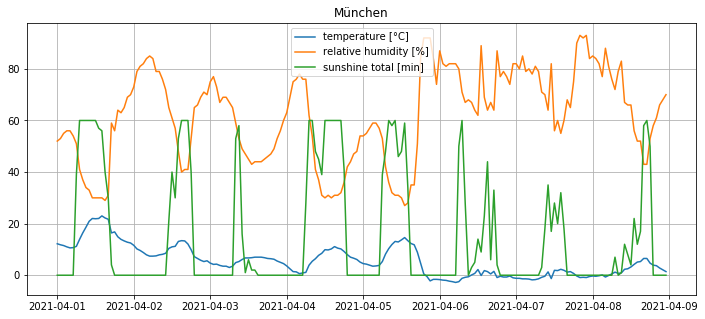

In [57]:
plt.figure(figsize=(12,5))
for key in ["temp", "rhum", "tsun"]:
    plt.plot(wd.index, wd[key], label=HOURLY_LU[key])
plt.title(location_name)
plt.grid(), plt.legend();

# Request daily weather data
https://dev.meteostat.net/api/point/daily.html#endpoint

In [18]:
url_daily = "https://api.meteostat.net/v2/point/daily"

In [19]:
params = {"lon":11.55, "lat":48.1333, "alt":520 , "start":"2020-05-01", "end":"2021-05-01"}
r = requests.get(url_daily, params=params, headers=headers)
r.ok

True

In [20]:
wd = pd.DataFrame(r.json()["data"])
wd["date"] = [dt.datetime.strptime(s, '%Y-%m-%d').date() for s in wd["date"]]
wd = wd.set_index("date")
wd

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
date,,,,,,,,,,
2020-05-01,10.7,8.0,15.9,8.3,NaN,NaN,11.0,36.0,1006.7,175.0
2020-05-02,8.7,5.1,12.4,6.6,NaN,NaN,14.0,46.0,1011.5,133.0
2020-05-03,10.0,5.1,15.4,0.0,NaN,235.0,8.0,27.0,1018.5,460.0
2020-05-04,12.9,9.6,17.3,2.2,NaN,243.0,8.0,32.0,1016.2,166.0
2020-05-05,9.7,6.0,13.1,0.0,NaN,218.0,8.0,26.0,1017.3,93.0
...,...,...,...,...,...,...,...,...,...,...
2021-04-27,10.2,2.9,16.9,0.0,0.0,73.0,12.0,33.0,1007.0,822.0
2021-04-28,12.8,4.2,20.0,0.0,0.0,73.0,8.0,24.0,1003.6,699.0
2021-04-29,12.4,9.2,15.5,3.5,0.0,246.0,13.0,41.0,1006.6,32.0


In [21]:
wd["sunh"] = wd["tsun"] / 60

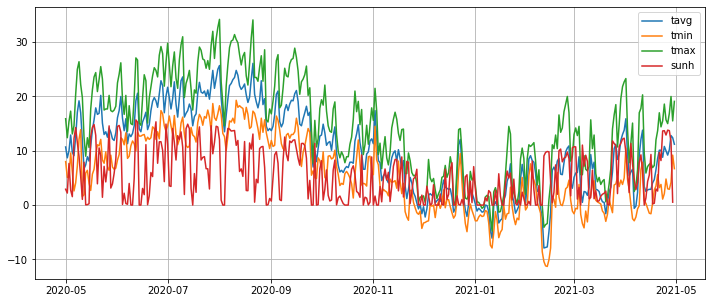

In [22]:
plt.figure(figsize=(12,5))
for key in ["tavg", "tmin", "tmax", "sunh"]:
    plt.plot(wd.index, wd[key], label=key)
plt.grid(), plt.legend();

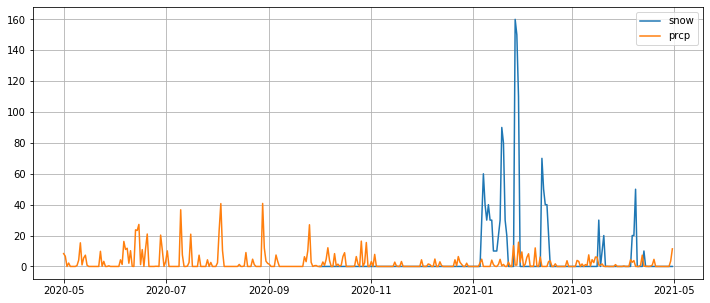

In [23]:
plt.figure(figsize=(12,5))
for key in ["snow", "prcp"]:
    plt.plot(wd.index, wd[key], label=key)
plt.grid(), plt.legend();